Now, that we have an idea on how this thing works, let's use the better implementation. That is word2vec.

In [6]:
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import gensim.models.word2vec as w2v
import matplotlib.pyplot as plt

The first problem we had, was lack of data. So let's collect more books

In [2]:
books=[open('./data/dorian.txt','r'),open('./data/earnest.txt','r'),
       open('./data/essays.txt','r'),open('./data/ghost.txt','r'),
       open('./data/happy_prince.txt','r'),open('./data/house_pomegranates.txt','r'),
       open('./data/ideal_husband.txt','r'),open('./data/intentions.txt','r'),
       open('./data/lady_windermere.txt','r'),open('./data/profundis.txt','r'),
       open('./data/salome.txt','r'),open('./data/soul_of_man.txt','r'),
       open('./data/woman_of_no_importance.txt','r')]

and we put them together in a large corpus

In [3]:
corpus = " ".join([book.read() for book in books])

And get the sentences from this.

In [7]:
raw_sentences = sent_tokenize(corpus)

Let's find the total number of sentences.

In [8]:
len(raw_sentences)

32195

and make our sentences into tokens.

In [13]:
sentences=[]
for sentence in raw_sentences:
    sentences+=[word_tokenize(sentence)]

We then create the VSM by feeding these sentences.

In [15]:
emb_model=w2v.Word2Vec(sentences)

And we can begin querying on this data

In [64]:
emb_model.most_similar("dead")

[('year', 0.9557549953460693),
 ('dress', 0.9513826370239258),
 ('youth', 0.9499835968017578),
 ('picture', 0.948140561580658),
 ('body', 0.945492148399353),
 ('suffering', 0.9421721696853638),
 ('killed', 0.9409987330436707),
 ('punishment', 0.939254879951477),
 ('characteristic', 0.9390841722488403),
 ('duties', 0.9368839263916016)]

In [28]:
emb_model.most_similar([emb_model['lady']+emb_model['queen']])

[('lady', 0.9807420969009399),
 ('aunt', 0.9766472578048706),
 ('pretty', 0.9754499197006226),
 ('Mermaid', 0.9721896648406982),
 ('pause', 0.9667738080024719),
 ('Rocket', 0.965640664100647),
 ('Giant', 0.9655534029006958),
 ('sad', 0.9655104279518127),
 ('Candle', 0.965121865272522),
 ('aged', 0.9637995958328247)]

In [36]:
emb_model.most_similar([(emb_model['no']+emb_model['artist']+emb_model['ethical']+emb_model['sympathies'])]) 

[('no', 0.9170416593551636),
 ('value', 0.8823171854019165),
 ('less', 0.8754990100860596),
 ('Art', 0.8683709502220154),
 ('modern', 0.8661969900131226),
 ('deal', 0.8592545986175537),
 ('real', 0.8511820435523987),
 ('also', 0.8504870533943176),
 ('Nature', 0.8483062386512756),
 ('something', 0.8472387790679932)]

# Visualizing the embeddings

Let's take a look at this embeddings, the best way is using tsne

In [43]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2,random_state=13)

We need a matrix of all the vector representation of our vocabulary

In [45]:
vectors_matrix = emb_model.wv.syn0

In [46]:
vectors_matrix_2d =tsne.fit_transform(vectors_matrix)

In [47]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
points= pd.DataFrame(
    [(word,coords[0],coords[1]) for word, coords in [
            (word,vectors_matrix_2d[emb_model.wv.vocab[word].index]) 
            for word in emb_model.wv.vocab
            ]
        ],
        columns=["word","x","y"]
    )

In [49]:
sns.set_context("poster")

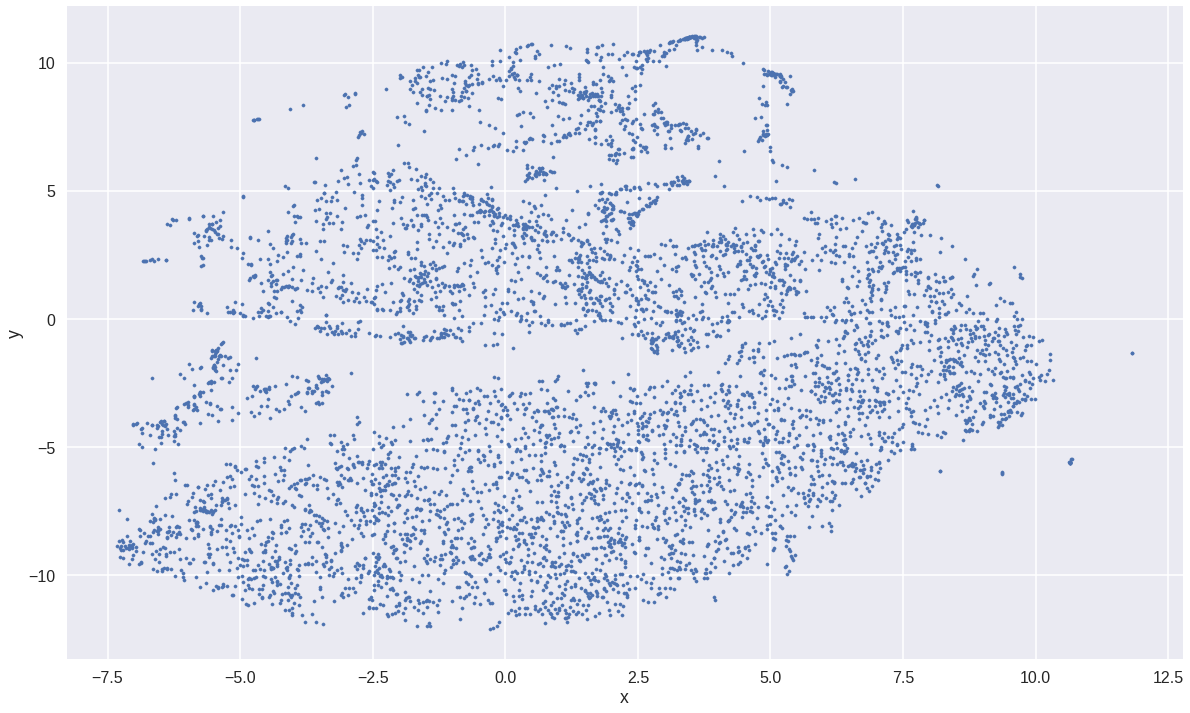

In [50]:
points.plot.scatter("x","y",s=10,figsize=(20,12))

In [62]:
def plot_regions(x_bounds,y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    ax =slice.plot.scatter("x","y",s=35,figsize=(12,10))
    for i, point in slice.iterrows():
        ax.text(point.x+0.005,point.y+0.005, point.word,fontsize=12)

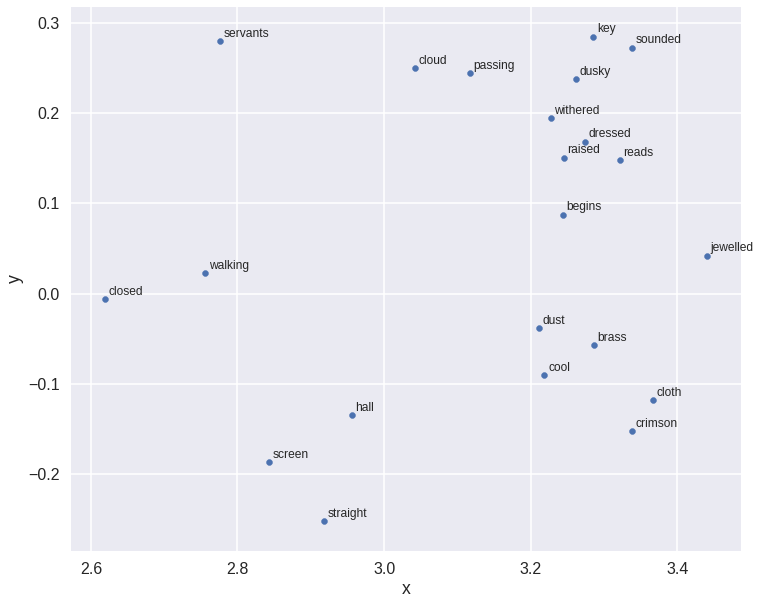

In [63]:
plot_regions(x_bounds=(2.5,3.5),y_bounds=(-0.3,0.3))

# Completing the model

We can use this word embedding as the matrix $U$ and so we only need to learn the matrix $V$

**Homework:** Do this.